# 0. Exercise on plate notation

Plate notation can also be used to represented repeated substructure with shared parameters (conditional probability distributions). 

<img src="./skills.png" alt="Drawing">

Assume that we have two students and two course. What does the unfolded models for the two plate models above look like?

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# Setup
We will now continue with more Pyro relateed exercises. Let's begin by installing and importing the modules we'll need.

In [1]:
#!pip install -q --upgrade pyro-ppl torch
import pyro
import torch
import pyro.distributions as dist

C:\Users\inigo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\inigo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\inigo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### **<span style="color:red">Exercise introduction</span>**

The main goal with the exercises below is to get some experience with probabilistic modeling. Here we exemplify modeling using Pyro, but any other probabilistic programming language could also have been used.

There are two explicit exercises embedded in this notebook (marked with red as above). Before working on these exercises, step carefully through the notebook leading up to the exercises and make sure that you have a good understanding on what is done in the individual steps.

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# 1. **Pyro’s distributions**:


Pyro provides a wide range of distributions: **Normal, Beta, Cauchy, Dirichlet, Gumbel, Poisson, Pareto, etc.**

In [2]:
normal = dist.Normal(0,1)
normal

Normal(loc: 0.0, scale: 1.0)


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Samples from the distributions are [Pytorch’s Tensor objects](https://pytorch.org/cppdocs/notes/tensor_creation.html) (i.e. multidimensional arrays).

In [3]:
sample = normal.sample()
sample

tensor(-0.9607)

In [4]:
sample = normal.sample(sample_shape=[3,4])
sample

tensor([[ 0.4042, -1.4671,  0.5974,  1.0964],
        [-0.1204,  0.8614, -1.1422,  1.3453],
        [-0.7444, -0.7258, -0.2351,  1.3335]])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

We can query the **dimensionlity** of a tensor with the ``shape`` property


In [5]:
sample = normal.sample(sample_shape=[3,4,5])
sample.shape

torch.Size([3, 4, 5])

In [7]:
sample

tensor([[[-0.0810, -0.1503, -2.2582,  0.0239, -1.3097],
         [ 1.1464,  0.6771,  0.5353, -0.0696, -0.8264],
         [-0.7196, -1.0317, -0.2483, -0.1814, -0.9101],
         [-2.3055,  0.4203, -0.6711,  1.1047,  1.3027]],

        [[-1.1887,  0.5591, -1.2324, -0.1357,  0.6271],
         [-0.4704, -0.1368,  0.6603,  0.7904, -0.0499],
         [ 1.6824,  1.7526, -0.4657,  1.1854,  0.1990],
         [ 0.1606, -0.1390, -0.4028, -0.0093,  1.0271]],

        [[ 2.2525,  0.8849, -0.5006,  0.6443,  0.6192],
         [ 0.0784,  1.7013, -0.0458,  0.2899,  1.5349],
         [-0.5962,  0.6479,  0.3292,  0.1055,  0.3688],
         [-0.7919, -0.5380,  0.1249,  0.2530, -1.5836]]])


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


Operations, like **log-likelihood**, are defined over tensors.

In [6]:
normal.log_prob(sample)

tensor([[[-0.9222, -0.9302, -3.4688, -0.9192, -1.7765],
         [-1.5761, -1.1482, -1.0622, -0.9214, -1.2604],
         [-1.1778, -1.4511, -0.9498, -0.9354, -1.3330],
         [-3.5766, -1.0073, -1.1441, -1.5291, -1.7674]],

        [[-1.6254, -1.0752, -1.6784, -0.9281, -1.1155],
         [-1.0296, -0.9283, -1.1369, -1.2313, -0.9202],
         [-2.3342, -2.4548, -1.0274, -1.6216, -0.9387],
         [-0.9318, -0.9286, -1.0001, -0.9190, -1.4464]],

        [[-3.4559, -1.3104, -1.0442, -1.1265, -1.1106],
         [-0.9220, -2.3662, -0.9200, -0.9610, -2.0968],
         [-1.0966, -1.1288, -0.9731, -0.9245, -0.9869],
         [-1.2325, -1.0637, -0.9267, -0.9509, -2.1729]]])

In [7]:
torch.sum(normal.log_prob(sample))

tensor(-88.8787)

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Multiple distributions can be embedded in single object. Below we define three Normal distributions with different means but the same scale in a single object.

In [8]:
normal = dist.Normal(torch.tensor([1.,2.,3.]),1.)
normal

Normal(loc: torch.Size([3]), scale: torch.Size([3]))

In [9]:
normal.sample()

tensor([1.0335, 4.7399, 3.1365])

In [10]:
normal.log_prob(normal.sample())

tensor([-0.9192, -5.2395, -0.9228])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### **<span style="color:red">Exercise: Open the notebook and play around</span>**

* Test that everything works.
* Play a bit with the code in Section 1 of the notebook.

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

# 2. **Pyro’s models**:

---
* In Pyro, a probabilistic model is defined as a **stochastic function** (i.e. every time it is run, it returns a new sample).

* Each random variable is associated with a **primitive stochastic function** using the construct ``pyro.sample(...)``.
---


### 2.1 A Temperature Model



As initial running example, we consider the problem of **modelling the temperature**. We first start with a simple model where temperture is modeled using a random Normal variable.

In [11]:
def model():
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    return temp

print(model())
print(model())

tensor(11.5256)
tensor(14.0638)


See how the model is a stochastic function which **returns a different value everytime it is invoked**. 

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### 2.2 A Temperature-Sensor Model

In Pyro, a stochastic method is defined as a composition of primitive stochastic functions.

*The temperature Model:* 

We consider the relation between the temperature and a sensor. 
  * The temperature sensor gives **noisy observations** about the real temperature.
  * The **error** of the sensor's measurements **is known**.

In [12]:
def model():
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    sensor = pyro.sample('sensor', dist.Normal(temp, 1.0))
    return (temp, sensor)

out1 = model()
out1

(tensor(13.2583), tensor(12.9058))

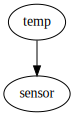

In [13]:
#Visualize the model
pyro.render_model(model)

The above method defines a joint probability distribution:
$$p(sensor, temp) = p(sensor|temp)p(temp)$$


In this case, we have a simple dependency between the variables. But, as we are in a PPL, dependencies can be expressed in terms of complex deterministic functions (more examples later).
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# 3. **Pyro’s inference** :

### Auxiliary inference functions

To make inference on Pyro, we will use a variational inference method, which performs gradient-based optimization to solve the inference problem. More details on variational inference will follow in the next lecture. 

In [14]:
from torch.distributions import constraints
from pyro.optim import SGD
from pyro.infer import Trace_ELBO
import matplotlib.pyplot as plt
from pyro.contrib.autoguide import AutoNormal


def svi(model, obs, guide=None, num_steps = 500, plot = False, verbose=False, lr=0.01):
    
    torch.manual_seed(999)

    pyro.clear_param_store()
    
    if guide is None:
        guide = AutoNormal(model)
    
    svi = pyro.infer.SVI(model=model,
                         guide=guide,
                         optim=SGD({"lr": lr, "momentum":0.1}),
                         loss=Trace_ELBO())

    losses, a,b  = [], [], []
    
    for t in range(num_steps):
        losses.append(svi.step(obs))
        if t%100==0:
            print('Step: '+str(t)+'. Loss: ' +str(losses[-1]))
            

    if (plot):
        plt.plot(losses)
        plt.title("ELBO")
        plt.xlabel("step")
        plt.ylabel("loss");
        plt.show()
        
    if verbose:
        print("Inference results:")
        for name, value in pyro.get_param_store().items():
            print(name, pyro.param(name))

A few notes on guides:
* To make inference in Pyro over a given model we need to define a *guide*, this *guide* has the same signature as its counterpart model. 

* The guide must provide samples for those variables of the model which are not observed. Again the ``pyro.sample`` construct. 

* Guides are also parametrized using Pyro's parameters (``pyro.param``), so the variational inference algorithm will optimize these parameters. 

* All of this will be explained in detail during the next lecture.

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### 3.1  Conditioning on a single observation

Now, we continue with the last model defined in section 2.2, and assume we have a sensor reading and we want to compute the posterior distribution over the real temperature. 

This can be achived by introducing **observations in the random variable** with the keyword ``obs=``.

In [15]:
#The observatons   
obs = {'sensor': torch.tensor(18.0)}

def model(obs):
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])

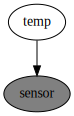

In [16]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ))

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


Inference is made using the previously defined auxiliary functions, ``svi`` and ``guide``. 

We can query the **posterior probability distribution**: 


$$p(temp | sensor=18)=\frac{p(sensor=18|temp)p(temp)}{\int p(sensor=18|temp)p(temp) dtemp}$$

Step: 0. Loss: 192.94428050518036
Step: 100. Loss: 16.130565762519836
Step: 200. Loss: 4.167756795883179
Step: 300. Loss: 2.995791018009186
Step: 400. Loss: 2.7210439443588257


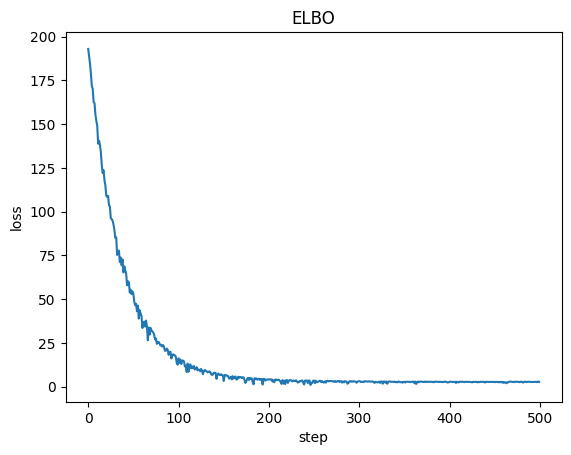

P(Temperature|Sensor=18.0) = 
Normal(loc: 17.31157684326172, scale: 0.8847724795341492)



In [18]:
#Run inference
svi(model,obs, plot=True)

#Print results
print("P(Temperature|Sensor=18.0) = ")
print(dist.Normal(pyro.param("AutoNormal.locs.temp").item(), pyro.param("AutoNormal.scales.temp").item()))
print("")

### 3.2  Learning from a bunch of observations

Let us assume we have a **set of observations** about the temperature at different time steps. 

* Following a probabilistic modelling approach, we define a **set of random variables**.

* One random variable for each **observation**, using a standard ``for-loop``.


In [19]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(15.0, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

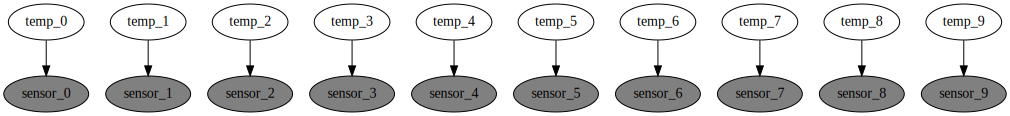

In [20]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ))

In [22]:
#Run inference
svi(model, obs, verbose=True)

Step: 0. Loss: 2270.0551331043243
Step: 100. Loss: 191.25131821632385
Step: 200. Loss: 55.76117891073227
Step: 300. Loss: 42.96208876371384
Step: 400. Loss: 40.83998894691467
Inference results:
AutoNormal.locs.temp_0 Parameter containing:
tensor(17.4279, requires_grad=True)
AutoNormal.scales.temp_0 tensor(0.8460, grad_fn=<SoftplusBackward0>)
AutoNormal.locs.temp_1 Parameter containing:
tensor(17.9418, requires_grad=True)
AutoNormal.scales.temp_1 tensor(0.8459, grad_fn=<SoftplusBackward0>)
AutoNormal.locs.temp_2 Parameter containing:
tensor(18.2756, requires_grad=True)
AutoNormal.scales.temp_2 tensor(0.8490, grad_fn=<SoftplusBackward0>)
AutoNormal.locs.temp_3 Parameter containing:
tensor(17.2302, requires_grad=True)
AutoNormal.scales.temp_3 tensor(0.9022, grad_fn=<SoftplusBackward0>)
AutoNormal.locs.temp_4 Parameter containing:
tensor(19.3044, requires_grad=True)
AutoNormal.scales.temp_4 tensor(0.7995, grad_fn=<SoftplusBackward0>)
AutoNormal.locs.temp_5 Parameter containing:
tensor(20.9

---
What if we do **not know the mean temperature** (as illustrated in the graphical model below)?
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem_sensor4.png?raw=1" alt="Drawing" width="150">
</center>

* We can **infer the parameter from the data** by, e.g., using a **maximum likelihood** approach,
$$ \mu_{t} = \arg\max_\mu \ln p(s_1,\ldots,s_n|\mu) = \arg\max_\mu \prod_i \int_{t_i} p(s_i|t_i)p(t_i|\mu) dt_i, $$ where $s_i$ and $t_i$ denote the sensor reading and the real temperature at time $i$. 

For now we do not consider the **underlying inference problem** We just define the model and let the **PPL's engine** do the work for us. 
* We use Pyro's parameters (defined as ``pyro.param``), which are free variables we can optimize. 


In [23]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.param('mean_temp', torch.tensor(15.0))
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

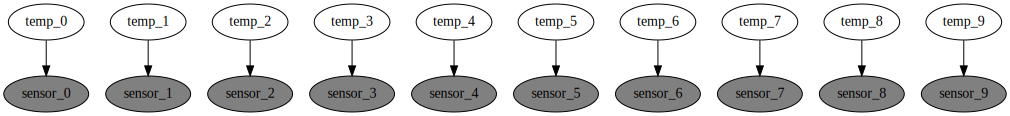

In [24]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ))

In [26]:
#Run inference
svi(model, obs)

#Print results
print("Estimated Mean Temperature (MLE):")
mle_mean_temp = pyro.param("mean_temp").item() 
print(mle_mean_temp)

Step: 0. Loss: 2270.0551331043243
Step: 100. Loss: 247.77836674451828
Step: 200. Loss: 56.34299170970917
Step: 300. Loss: 23.71842250227928
Step: 400. Loss: 18.077348232269287
Estimated Mean Temperature (MLE):
19.568622589111328


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png" alt="Drawing" width=2000 height=20>

Instead of performing *maximum likelihood* learning, we can perform **Bayesian learning**.
* We treat the unknown quantity as a **random variable**.

* This model can be graphically represented as follows:

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor2.png?raw=1" alt="Drawing" width="150">
</center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

In [27]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

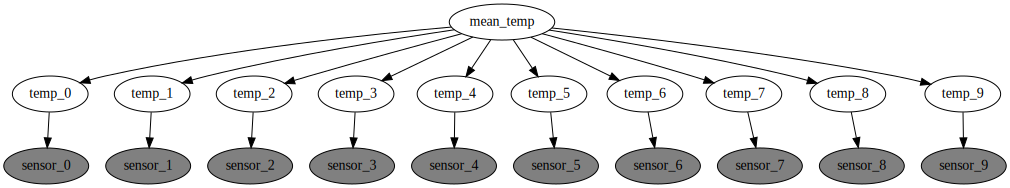

In [28]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ))

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

We perform inference over this model (see Slides from the last lecture):

 $$ p(\mu_t | s_1,\ldots, s_n)=\frac{p(\mu_t)\prod_{i=1}^n \int p(s_i|t_i)p(t_i|\mu_t)dt_i }{\int \prod_{i=1}^n p(s_i|\mu_t)p(\mu_t) d\mu} $$


In [29]:
import time
        
#Run inference
start = time.time()
svi(model, obs)

#Print results
print("P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))
print("")
end = time.time()
print(f"{(end - start)} seconds")

Step: 0. Loss: 2015.5953184366226
Step: 100. Loss: 286.3637125492096
Step: 200. Loss: 57.62918394804001
Step: 300. Loss: 25.598888337612152
Step: 400. Loss: 23.2999709546566
P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =
Normal(loc: 19.180583953857422, scale: 0.6147986650466919)

5.2099609375 seconds


As we also saw in the last lecture, the result of the learning is **not a point estimate**. Instead we have a **posterior distribution**, which captures the **uncertainty** about the estimation.

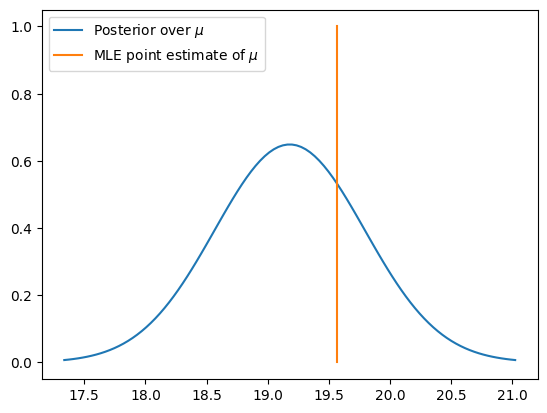

In [31]:
import numpy as np
import scipy.stats as stats

mu = pyro.param("AutoNormal.locs.mean_temp").item()
scale = pyro.param("AutoNormal.scales.mean_temp").item()
x = np.linspace(mu - 3*scale, mu + 3*scale, 100)
plt.plot(x, stats.norm.pdf(x, mu, scale), label='Posterior over $\mu$')
point = mle_mean_temp # Previously calculated above
plt.plot([point, point],[0., 1.], label='MLE point estimate of $\mu$')
plt.legend()
plt.show()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png" alt="Drawing" width=2000 height=20>


### 3.3 The use of ``plate`` construct

* Pyro can exploit **conditional independencies and vectorization** to make inference much faster. 

* This can be done with the construct **``plate``**. 

* With this construct, we can indicate that the variables $s_i$ and $t_i$ are **conditionally indepdendent** from other variables $s_j$ and $t_j$ given $\mu_t$. 

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor2.png?raw=1" alt="Drawing" width="150">
</center>

In [32]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    with pyro.plate('a', obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])

The ``plate`` construct reflects the standard notational use in graphical models denoting the **repetition of some parts of of the graph**. 
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor3.png?raw=1" alt="Drawing" width="250">
</center>

We can here make a distinction between **local** and **global** random variables: 

* **Local random variables** caputure **specific information** about the $i$-th data sample (i.e. the real temperature at this moment in time).

* **Global random variables** capture **common information** about all the data samples (i.e. the average temperature of all data samples). 

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


Observe how inference in this model is much **faster**. 

In [34]:
#Run inference
start = time.time()
svi(model, obs)

#Print results
print("P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))
print("")
end = time.time()
print(f"{(end - start)} seconds")

Step: 0. Loss: 2015.5951808691025
Step: 100. Loss: 286.3637121915817
Step: 200. Loss: 57.62918198108673
Step: 300. Loss: 25.59889566898346
Step: 400. Loss: 23.299971967935562
P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =
Normal(loc: 19.180583953857422, scale: 0.6147986650466919)

1.277097225189209 seconds


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### **<span style="color:red">Exercise 2: </span>The role of *prior distributions* in learning**

In this case we just want to illustrate how the output of learning depends of the particular prior we introduce in the model. Play with different options and extract conclusions:

1. What happens if we change the mean of the prior?
2. What happens if we change the scale of the prior?
3. What happens to the posterior if the number of data samples deacreases and increases?

The code below might be helpful.

Step: 0. Loss: 1827.4828042826157
Step: 100. Loss: 263.50382657748986
Step: 200. Loss: 55.99980222903987
Step: 300. Loss: 26.751384355937056
Step: 400. Loss: 24.743153109693864
P(Temperature|Sensor=18.0) = 
Normal(loc: 18.26260757446289, scale: 0.6152685284614563)


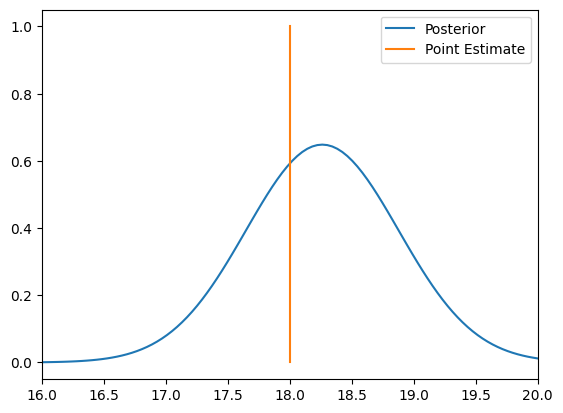

In [36]:
#The observatons   
sample_size = 10
obs = {'sensor': torch.tensor(np.random.normal(18,2,sample_size))}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    with pyro.plate('N='+str(obs['sensor'].shape[0]), obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])

#Run inference
svi(model, obs)

#Print results
print("P(Temperature|Sensor=18.0) = ")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))

x = np.linspace(16, 20, 100)
plt.plot(x, stats.norm.pdf(x, pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()), label='Posterior')
point = 18
plt.plot([point, point],[0., 1.], label='Point Estimate')
plt.xlim(16,20)
plt.legend()
plt.show()
